# **Import**


In [ ]:
import nltk
import numpy as np
nltk.download('punkt')

!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

import pandas as pd
import regex
from pythainlp.tokenize import word_tokenize

from google.colab import drive

drive.mount('/content/gdrive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 18.9 MB 5.7 MB/s 0:00:04
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 5.0 MB/s eta 0:00:00
  Created wheel for pythainlp: filename=pythainlp-4.0.0.dev0-py3-none-any.whl size=13392786 sha256=899890b0851c9d8c48963fb15956f0aa8204ad35864a7e2d3e7e7750864618d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4994uvks/wheels/51/04/24/dbbb71f7536162532b7e9d1103f43f48f2f93a8c42e5bdd32b
Successfully built pythainlp
Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/Python_Source"

outputfinal.csv  OutputPj.csv	     tweet_emotionstest.csv  weather2.csv
OutputPj2.csv	 tweet_emotions.csv  weather1.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Python_Source/OutputPj2.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Python_Source/OutputPj2.csv', low_memory=False,usecols=lambda c: not c.startswith('Unnamed:'))

df

,Column1,label,username,keywords,content
0,0,1,prtyfst,เกลียดตัวเอง,เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้
1,1,1,fsj_hMoon,อยากตาย,เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย
2,3,1,fromhellafter,อยากตาย,เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...
3,4,1,Wiladda_,อยากตาย,ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ
4,5,1,thawanpang,อยากตาย,อยากตายอยากตายอยากตายอยากตาย
...,...,...,...,...,...
1505,1507,0,khitaXXL,เกลียดตัวเอง,ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...
1506,1508,0,mmyyyxx_,เกิดมาทำไม,ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...
1507,1509,0,IO_from_Hell,เกิดมาทำไม,@BadStudent_ เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง...
1508,1510,0,giggokam,เกิดมาทำไม,(3) มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมี...


In [ ]:
import re
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

matplotlib.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
matplotlib.rc("font", family='TH Sarabun New', size=16)

<AxesSubplot:>

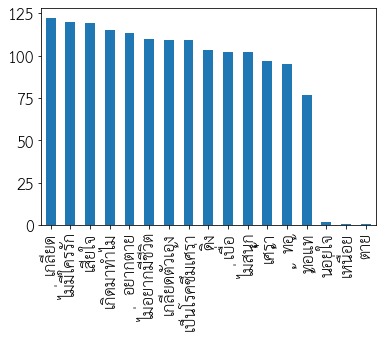

In [ ]:
df.keywords.value_counts().plot(kind='bar')

# **Clean Data**

In [ ]:
def my_clean(txt):
  txt = regex.sub('http\S+', 'url', txt)
  txt = regex.sub('[?#@]', '', txt)

  txt = regex.sub('[A-Za-z0-9_]+', '', txt)
  txt = regex.sub('#[A-Za-z0-9_]+', '', txt)
  txt = "".join(c for c in txt if c not in ("?",".",";",":","!",'"',"ฯ","ๆ","|","/",",",")","(","-"))

  return txt

In [ ]:
df['clean'] = df.content.apply(my_clean)

In [ ]:
df

,Column1,label,username,keywords,content,clean
0,0,1,prtyfst,เกลียดตัวเอง,เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้,เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้
1,1,1,fsj_hMoon,อยากตาย,เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย,เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย
2,3,1,fromhellafter,อยากตาย,เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...,เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...
3,4,1,Wiladda_,อยากตาย,ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ,ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ
4,5,1,thawanpang,อยากตาย,อยากตายอยากตายอยากตายอยากตาย,อยากตายอยากตายอยากตายอยากตาย
...,...,...,...,...,...,...
1505,1507,0,khitaXXL,เกลียดตัวเอง,ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...,ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...
1506,1508,0,mmyyyxx_,เกิดมาทำไม,ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...,ทำงานจสเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกกุ...
1507,1509,0,IO_from_Hell,เกิดมาทำไม,@BadStudent_ เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง...,เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง มึง หลอนหนั...
1508,1510,0,giggokam,เกิดมาทำไม,(3) มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมี...,มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมีวูบ...


 # **Word Tokenize**

In [ ]:
def my_tokenise(txt):

  txt = word_tokenize(txt, keep_whitespace=False)
  txt = ' '.join(txt)

  return txt

In [ ]:
df['token'] = df.clean.apply(my_tokenise)

In [ ]:
df


,Column1,label,username,keywords,content,clean,token
0,0,1,prtyfst,เกลียดตัวเอง,เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้,เกลียดตัวเอง ทำไมถึงเหี้ยได้ขนาดนี้,เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้
1,1,1,fsj_hMoon,อยากตาย,เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย,เหนื่อยว่ะไอ้เหี้ย อยากตายชิบหาย,เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย
2,3,1,fromhellafter,อยากตาย,เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...,เราไม่เคยดีใจที่ได้เกิดมาเพราะเขาเลย เรารู้สึก...,เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย...
3,4,1,Wiladda_,อยากตาย,ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ,ปวดหัวไม่ไหวกับอีกทาง อห อยากตายตามแม่ไปด้วยอะ,ปวดหัว ไม่ ไหว กับ อีก ทาง อห อยาก ตาย ตาม แม่...
4,5,1,thawanpang,อยากตาย,อยากตายอยากตายอยากตายอยากตาย,อยากตายอยากตายอยากตายอยากตาย,อยาก ตาย อยาก ตาย อยาก ตาย อยาก ตาย
...,...,...,...,...,...,...,...
1505,1507,0,khitaXXL,เกลียดตัวเอง,ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...,ร้องไห้เสียใจอยู่แต่ดันเจอผญตรงไทป์กูเลยเลิกร้...,ร้องไห้ เสียใจ อยู่ แต่ ดัน เจอ ผญ ตรง ไท ป์ ก...
1506,1508,0,mmyyyxx_,เกิดมาทำไม,ทำงานจ-สเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกก...,ทำงานจสเป็นอะไรที่เหนื่อยมากในชีวิต จนรู้สึกกุ...,ทำงาน จส เป็น อะไร ที่ เหนื่อย มาก ใน ชีวิต จน...
1507,1509,0,IO_from_Hell,เกิดมาทำไม,@BadStudent_ เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง...,เป็นส้นตีน อะไร แดกยา ไม่ครบ รึไง มึง หลอนหนั...,เป็น ส้นตีน อะไร แดก ยา ไม่ ครบ รึ ไง มึง หลอน...
1508,1510,0,giggokam,เกิดมาทำไม,(3) มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมี...,มีแต่คำถาม มีแต่คำพูดเข้ามา เอาจริงนะมันมีวูบ...,มี แต่ คำถาม มี แต่ คำพูด เข้ามา เอาจริง นะ มั...


In [ ]:
df.token.values

array(['เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้',
       'เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย',
       'เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย เรา รู้สึก แย่ ทุกวัน เรา อยาก ตาย เพราะ เขา รอบ ที่ เท่าไหร่ แล้วก็ ไม่ รู้ มี ฝน ตกใน ใจ ทุก วันแม่ ง แย่ สัส อยาก หนี ไป จาก ตรงนี้ อยาก พ้น ไม เน้อ สักที จะ ว่า เรา เห็นแก่ตัว ก็ได้ แต่ เรา เหนื่อย แล้ว จริง',
       ...,
       'เป็น ส้นตีน อะไร แดก ยา ไม่ ครบ รึ ไง มึง หลอน หนัก ชิบหาย วัน ทั้งวัน หมกหมุ่น แต่ เรื่อง ห่า อะไร ก็ ไม่ รู้ แม่ ง เกิด มา ทำไม ก็ ไม่ รู้ ทำ แต่ เรื่อง เหี้ย',
       'มี แต่ คำถาม มี แต่ คำพูด เข้ามา เอาจริง นะ มัน มี วูบ นึง ที่ โคตร จะ ไม่ อยาก ลืมตา ตื่นขึ้น มา บน โลก เลย อยู่ ทำไม วะ เกิด มา ทำไม แต่ อีก ใจ ก็ ต้องสู้ ดิ วะ จะ ยอมแพ้ ไม่ ได้ หือ ออ ออ ออ ออ ออ',
       'พวก มี แฟน แต่ ทัก หา คน ไป ทั่ว เชิง ชู้สาว แบบนี้ เกิด มา ทำไม'],
      dtype=object)

In [ ]:
' '.join(df.token.values)

"เกลียด ตัวเอง ทำไม ถึง เหี้ย ได้ขนาด นี้ เหนื่อย ว่ะ ไอ้ เหี้ย อยาก ตาย ชิบหาย เรา ไม่ เคย ดีใจ ที่ ได้ เกิด มา เพราะ เขา เลย เรา รู้สึก แย่ ทุกวัน เรา อยาก ตาย เพราะ เขา รอบ ที่ เท่าไหร่ แล้วก็ ไม่ รู้ มี ฝน ตกใน ใจ ทุก วันแม่ ง แย่ สัส อยาก หนี ไป จาก ตรงนี้ อยาก พ้น ไม เน้อ สักที จะ ว่า เรา เห็นแก่ตัว ก็ได้ แต่ เรา เหนื่อย แล้ว จริง ปวดหัว ไม่ ไหว กับ อีก ทาง อห อยาก ตาย ตาม แม่ ไป ด้วย อะ อยาก ตาย อยาก ตาย อยาก ตาย อยาก ตาย หุบปาก ซะ การกระทำ ของ คุณ จะ นำ คุณ ไป สู่ ความล้มเหลว และ ฉัน หวัง ว่า คุณ จะ ดู แย่ จน อยาก ตาย แค่ มอง กระจก ฉัน เกลียด คุณ มาก คุณ ไม่ สมควร ได้รับ สิ่ง นั้น ด้วยซ้ำ คุณ คือ ทุกสิ่ง ที่ น่ารังเกียจ ที่ มี อยู่ ใน โลก นี้ อยาก ตาย ให้ มัน รู้ ไป เลย ว่า ยัง คาดหวัง อะไร อยู่ ไหม อยาก ตาย อยู่ ทุกวัน เครียด อยาก ตาย แม่ ง ไม่ ได้ อยาก ตาย แต่ ไม่ อยาก ตื่นขึ้น มา เจอ เรื่อง ที่ เรา รู้สึก ว่า แย่ แม่ ง เป็น ความรู้สึก ที่ อึดอัด วะ สึม อยาก ตาย โก ด ตัวเอง ตกค่ำ แล้ว ดาวน์ มัน อยาก ตาย อยาก หาย ไป อีกแล้ว เกิด จาก ไร วะ เหนื่อย เบื่อชีวิต คิดไม่ออก หนึ่ง ใน 

# **Word Cloud**

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2023-02-26 03:03:00--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-02-26 03:03:01--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2023-02-26 03:03:01 (9.59 MB/s) - ‘t

In [ ]:
import re
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

matplotlib.rc("font", family="TH Sarabun New")

font_path = '/content/thsarabunnew-webfont.ttf'

In [ ]:
regexp = r"[\u0E00-\u0E7Fa-zA-Z']+" # [ก-๙a-zA-Z]

thai_stopwords = set(STOPWORDS)
thai_stopwords = ['ไว้',	'หาก',	'ทั้งนั้น','ไม่',	'หลาย',	'ถ้า','ไป',	'หลังจาก',	'ถูก','ได้',	'หลัง',	'ถึง',
'ให้',	'หรือ',	'ต้อง','ใน',	'หนึ่ง',	'ต่างๆ','โดย',	'ส่วน',	'ต่าง','แห่ง',	'ส่ง',	'ต่อ','รับงาน','มั้ย',
'แล้ว',	'สุด',	'ตาม','และ',	'สําหรับ',	'ตั้งแต่','แรก',	'ว่า',	'ตั้ง','แบบ',	'วัน',	'ด้าน','อ่ะ','กก',
'แต่',	'ลง',	'ด้วย','เอง',	'ร่วม',	'ดัง','เห็น',	'ราย',	'ซึ่ง','เลย',	'รับ',	'ช่วง','เริ่ม',	'ระหว่าง',
'จึง','เรา',	'รวม',	'จาก','เมื่อ',	'ยัง',	'จัด','เพื่อ',	'มี',	'จะ','เพราะ',	'มาก',	'คือ','เป็นการ',	'มา',	'ความ',
'เป็น',	'พร้อม',	'ครั้ง','เปิดเผย',	'พบ',	'คง','เปิด',	'ผ่าน',	'ขึ้น','เนื่องจาก',	'ผล',	'ของ','เดียวกัน',	'บาง',	'ขอ',
'เดียว',	'น่า',	'ขณะ','เช่น',	'นี้',	'ก่อน','เฉพาะ',	'นํา',	'ก็','เคย',	'นั้น',	'การ','มัน','นะคะ',
'เข้า',	'นัก',	'กับ','เขา',	'นอกจาก',	'กัน','อีก',	'ทุก',	'กว่า','อาจ',	'ที่สุด',	'กล่าว','ไหน','บ้าง','วะ','ค่ะ',
'อะไร',	'ที่',	'ออก',	'ทําให้',	'อย่าง',	'ทํา',	'อยู่',	'ทาง',	'อยาก',	'ทั้งนี', 'กุ', 'ละ','อะ','นะ','ๆ','กู']

> Depression Wordcloud

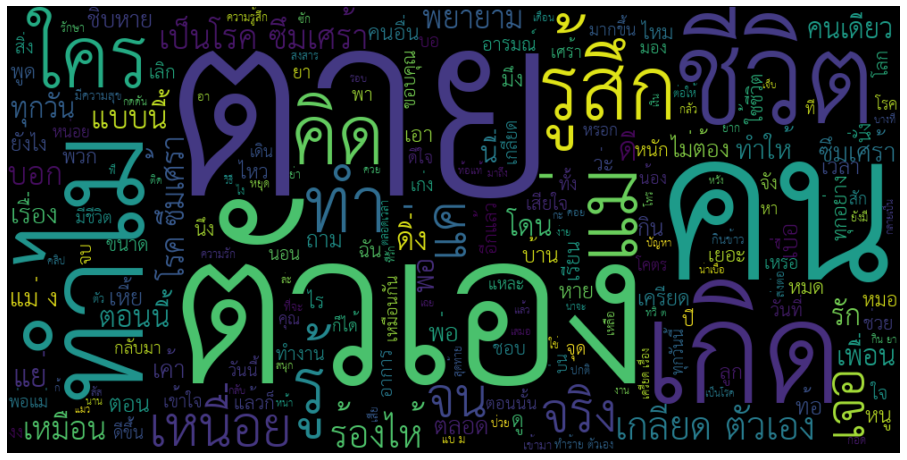

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=200,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.label == 1].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

> Not Depressed Wordcloud

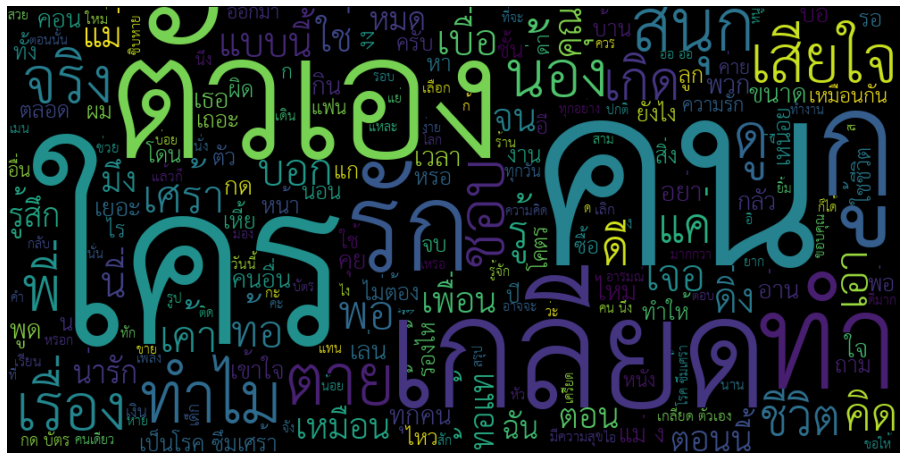

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,
    background_color = 'black',
    width = 1000,
    height = 500,
    regexp=regexp,
    max_words=200,
    stopwords = thai_stopwords,).generate(str(' '.join(df[df.label == 0].token.values)))

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# **Train Model**







In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.token.values)

print(X.shape)
print(X.toarray())
print(vectorizer.get_feature_names_out())

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X.toarray())

x = tfidf.toarray()
y_true = df.label.to_numpy()


(1510, 2835)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['กก' 'กกก' 'กกระอ' ... 'ไอร' 'ไฮ' 'ไใ']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier

> GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3)

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Y_Predict (GaussianNB) = " , y_pred)
print("Confusion_matrix (GaussianNB) = ",confusion_matrix(y_test, y_pred))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred,average='weighted'), 2)))
print('F-measure (GaussianNB) = ',str(round(metrics.f1_score(y_test,y_pred,average='weighted'), 2)))


Y_Predict (GaussianNB) =  [1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0]
Confusion_matrix (GaussianNB) =  [[270 103]
 [ 46  34]

> Decision Tree

In [ ]:
modelfinal = tree.DecisionTreeClassifier(max_depth=4)
modelfinal.fit(x_train, y_train)
y_pred = modelfinal.predict(x_test)

print("Y_Predict (Decision Tree) = " , y_pred)
print("Confusion_matrix (Decision Tree) = ",confusion_matrix(y_test, y_pred))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred,average='weighted'), 2)))
print('F-measure (Decision Tree) = ',str(round(metrics.f1_score(y_test,y_pred,average='weighted'), 2)))

Y_Predict (Decision Tree) =  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Confusion_matrix (Decision Tree) =  [[363  10]
 [ 7

> KNeighbors

In [ ]:
knn= neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

print("Y_Predict (KN) = " , y_pred1)
print("Confusion_matrix (KN) = ",confusion_matrix(y_test, y_pred1))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred1), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred1,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred1,average='weighted'), 2)))
print('F-measure (KN) = ',str(round(metrics.f1_score(y_test,y_pred1,average='weighted'), 2)))

Y_Predict (KN) =  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
Confusion_matrix (KN) =  [[333  40]
 [ 53  27]]
Accuracy =  0.

> Artificial Neural Network

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
model.fit(x_train, y_train)
y_pred4 = model.predict(x_test)

print("Y_Predict (Neural Network) = " , y_pred4)
print("Confusion_matrix (Neural Network) = ",confusion_matrix(y_test, y_pred4))
print("Accuracy = ",str(round(metrics.accuracy_score(y_test, y_pred4), 2)))
print('Precision = ',str(round(metrics.precision_score(y_test,y_pred4,average='weighted'), 2)))
print('Recall = ',str(round(metrics.recall_score(y_test,y_pred4,average='weighted'), 2)))
print('F-measure (Neural Network) = ',str(round(metrics.f1_score(y_test,y_pred4,average='weighted'), 2)))

Y_Predict (Neural Network) =  [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Confusion_matrix (Neural Network) =  [[334  39]
 [

# **Result**




In [ ]:
# 0 Is Not Depressed
# 1 Is Depressed

inp = input()
cleaned = my_clean(inp)
cleaned = vectorizer.transform([my_tokenise(cleaned)]).toarray()
result = modelfinal.predict(cleaned)
print('Result is',result)

อยากตายมากๆ
Result is [1]
